<a href="https://colab.research.google.com/github/suryareddy1376/DeepLearning/blob/main/Sequential_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import Modules for data manipulation

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading the data

In [10]:
data = pd.read_excel('/content/train1.csv.xlsx')

In [11]:
data.head()

,ID,datetime,temperature,pressure,windspeed,electricity_consumption
0,0,2013-07-01 00:00:00,-11.4,1003.0,571.910,216
1,1,2013-07-01 01:00:00,-12.1,996.0,575.040,210
2,2,2013-07-01 02:00:00,-12.9,1000.0,578.435,225
3,3,2013-07-01 03:00:00,-11.4,995.0,582.580,216
4,4,2013-07-01 04:00:00,-11.4,1005.0,586.600,222


Deleting the ID Column becuase it doesn't depend on the training data

In [12]:
del data['ID']

In [13]:
data.head()

,datetime,temperature,pressure,windspeed,electricity_consumption
0,2013-07-01 00:00:00,-11.4,1003.0,571.910,216
1,2013-07-01 01:00:00,-12.1,996.0,575.040,210
2,2013-07-01 02:00:00,-12.9,1000.0,578.435,225
3,2013-07-01 03:00:00,-11.4,995.0,582.580,216
4,2013-07-01 04:00:00,-11.4,1005.0,586.600,222


In [14]:
data.describe()

,datetime,temperature,pressure,windspeed,electricity_consumption
count,26496,26496.000000,26496.000000,26496.000000,26496.000000
mean,2015-06-28 07:30:00,5.098989,986.450615,23.959956,298.359601
min,2013-07-01 00:00:00,-17.100000,953.000000,1.075000,174.000000
25%,2014-06-29 05:45:00,-2.900000,978.000000,3.155000,219.000000
50%,2015-06-27 11:30:00,6.400000,986.000000,6.545000,267.000000
75%,2016-06-25 17:15:00,12.100000,995.000000,22.260000,342.000000
max,2017-06-23 23:00:00,23.600000,1024.000000,586.600000,1386.000000
std,NaN,8.682860,12.002647,48.280321,108.020555


Here we're training the model through time series. So, we need to sort the values on the order of timeseries

In [15]:
data['datetime'] = pd.to_datetime(data['datetime'])
data = data.sort_values('datetime').reset_index(drop=True)


In [16]:
data.head()

,datetime,temperature,pressure,windspeed,electricity_consumption
0,2013-07-01 00:00:00,-11.4,1003.0,571.910,216
1,2013-07-01 01:00:00,-12.1,996.0,575.040,210
2,2013-07-01 02:00:00,-12.9,1000.0,578.435,225
3,2013-07-01 03:00:00,-11.4,995.0,582.580,216
4,2013-07-01 04:00:00,-11.4,1005.0,586.600,222


We are changing the data as index as timeseries data and columns are remain constant

In [17]:
full_range = pd.date_range(
    start=data['datetime'].min(),
    end=data['datetime'].max(),
    freq='H'
)

data = data.set_index('datetime').reindex(full_range)


/tmp/ipython-input-4200578621.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_range = pd.date_range(


Making data clean if any NaN values occurs

In [18]:
data['electricity_consumption'] = data['electricity_consumption'].interpolate()
data[['temperature','pressure','windspeed']] = (
    data[['temperature','pressure','windspeed']].interpolate()
)



In [19]:
data.head()

,temperature,pressure,windspeed,electricity_consumption
2013-07-01 00:00:00,-11.4,1003.0,571.910,216.0
2013-07-01 01:00:00,-12.1,996.0,575.040,210.0
2013-07-01 02:00:00,-12.9,1000.0,578.435,225.0
2013-07-01 03:00:00,-11.4,995.0,582.580,216.0
2013-07-01 04:00:00,-11.4,1005.0,586.600,222.0


In [20]:
data.dtypes

,0
temperature,float64
pressure,float64
windspeed,float64
electricity_consumption,float64


Here we're splitting data into 3 categories




1.   train
2.   validation
3.   test



In [21]:
n = len(data)
train = data.iloc[:int(0.7*n)]
val   = data.iloc[int(0.7*n):int(0.85*n)]
test  = data.iloc[int(0.85*n):]


Set the target columns

In [22]:
target_col = 'electricity_consumption'
feature_cols = data.columns.drop(target_col)


For making the data efficient, We'll do stardardization through StandardScalar

In [23]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X = X_scaler.fit_transform(train[feature_cols])
val_X   = X_scaler.transform(val[feature_cols])
test_X  = X_scaler.transform(test[feature_cols])

train_y = y_scaler.fit_transform(train[[target_col]])
val_y   = y_scaler.transform(val[[target_col]])
test_y  = y_scaler.transform(test[[target_col]])


In [24]:
train_X[:]

array([[-1.84806577,  1.45686334, 11.78447588],
       [-1.92768263,  0.86325744, 11.85180672],
       [-2.01867332,  1.20246081, 11.9248381 ],
       ...,
       [ 0.09686037,  1.88086755,  0.83665309],
       [-0.06237335,  1.54166418,  0.89053928],
       [ 0.01724351,  1.79606671, -0.48285932]])

Creating the window for splitting one day to 24 hours frames of windows

In [25]:
def create_windows(X, y, window):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)


Creating the windows for diffrent types of models

In [26]:
WINDOW = 24

X_train, y_train = create_windows(train_X, train_y, WINDOW)
X_val, y_val     = create_windows(val_X, val_y, WINDOW)
X_test, y_test   = create_windows(test_X, test_y, WINDOW)


In [28]:
timesteps = 24
n_features = X_train.shape[2]


Import Deep Learning Framework Models

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout

For making the time series data prediction correctly we'll use sequential models for better result

In [34]:
model = keras.models.Sequential([
    Conv1D(
        filters=64,
        kernel_size=3,
        activation='relu',
        input_shape=(timesteps, n_features)
    ),
    Conv1D(
        filters=32,
        kernel_size=3,
        activation='relu'
    ),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1)
])

Importing the Adam optimizer because it adapts learning rate per parameter

---


It's suitable with noisy data as this data is electricity + weather


In [35]:
from tensorflow.keras.optimizers import Adam

In [36]:
model.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='huber',
    metrics=['mae']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 22, 64)         │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 20, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │        20,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,361 (106.88 KB)

 Trainable params: 27,361 (106.88 KB)

 Non-trainable params: 0 (0.00 B)

Plotting the model

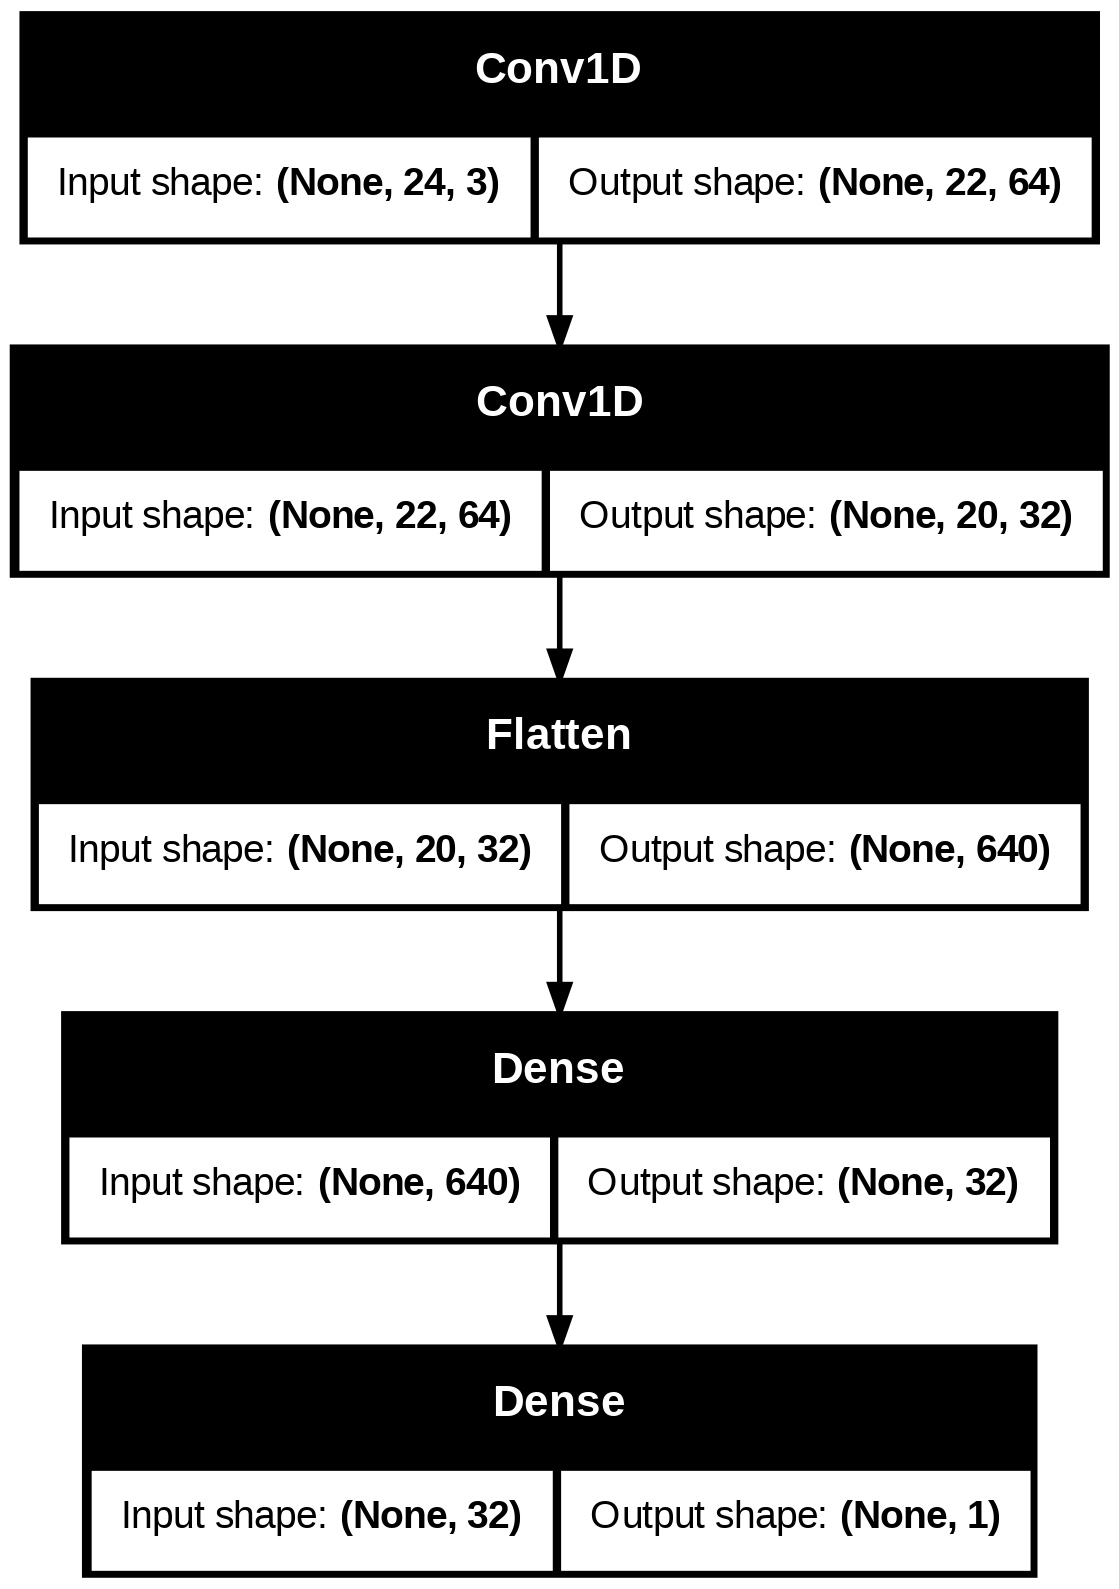

In [41]:
keras.utils.plot_model(model,show_shapes=True)

Training using train data and validation data

In [37]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=32,
    shuffle=False,
    verbose=1
)


Epoch 1/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.3695 - mae: 0.7057 - val_loss: 0.7963 - val_mae: 1.1849
Epoch 2/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3623 - mae: 0.6991 - val_loss: 0.7942 - val_mae: 1.1786
Epoch 3/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3530 - mae: 0.6892 - val_loss: 0.6471 - val_mae: 1.0068
Epoch 4/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3293 - mae: 0.6517 - val_loss: 0.7695 - val_mae: 1.1504
Epoch 5/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.3337 - mae: 0.6530 - val_loss: 0.6834 - val_mae: 1.0400
Epoch 6/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3209 - mae: 0.6361 - val_loss: 0.7081 - val_mae: 1.0764
Epoch 7/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3222 - mae: 0.6434 - val_loss: 0.6531 - val_mae: 1.0097
Epoch 8/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3127 - mae: 0.6301 - val_loss: 0.6822 - val_mae: 1.0431
Epoch 9/40
763/763 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - lo

Calculating the RMSE

In [42]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print("RMSE:", rmse)




RMSE: 102.10032770874477
